In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

In [ ]:
#videofile = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1.mp4"
videofile = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"
#videofile = "Comparisons/10X Ph- 9Fps Wash 1 16 P018cu R1.mp4"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

In [ ]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

print(t.head())

In [ ]:
importlib.reload(tracker)

compute_segments = False
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

In [14]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

In [ ]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final, visualization="segments")

# Run Metrics

In [36]:
#prediction = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1_predicted.csv"
#groundtruth = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1_corrected.csv"
#videofile = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1.mp4"

#prediction = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P017me R1_predicted.csv"
#groundtruth = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P017me R1_corrected.csv"
#videofile = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"

prediction = "Comparisons/10X Ph- 9Fps Wash 1 16 P018cu R1_predicted.csv"
groundtruth = "Comparisons/10X Ph- 9Fps Wash 1 16 P018cu R1_corrected.csv"
videofile = "Comparisons/10X Ph- 9Fps Wash 1 16 P018cu R1.mp4"

# Load as Pandas DataFrame
pred = utils.loadDataFrame(prediction)
gt = utils.loadDataFrame(groundtruth)


In [37]:
import pandas as pd

def interpolateTracks(df):

    result = df.copy()

    for sperm in range(0, df['sperm'].max() + 1):
        sperm_frames = df[df['sperm'] == sperm]['frame'].values
        if len(sperm_frames) > 0:
            birth = np.amin(sperm_frames)
            death = np.amax(sperm_frames)


            # Find if the sperm exists for all frames
            if len(sperm_frames) != death - birth + 1:
                print("Missing frames for sperm: ", sperm)
                print("Birth: ", birth, ", Death: ", death)
                print("Frames: ", sperm_frames)

                for j in range(birth, death + 1):
                    if j not in sperm_frames:

                        # Find closest frame after the missing frame
                        before = np.amax(sperm_frames[np.where(sperm_frames < j)])
                        after = np.amin(sperm_frames[np.where(sperm_frames > j)])

                        # interpolate x and y
                        before_x = gt[(gt['sperm'] == sperm) & (gt['frame'] == before)]['x'].values[0]
                        before_y = gt[(gt['sperm'] == sperm) & (gt['frame'] == before)]['y'].values[0]
                        after_x = gt[(gt['sperm'] == sperm) & (gt['frame'] == after)]['x'].values[0]
                        after_y = gt[(gt['sperm'] == sperm) & (gt['frame'] == after)]['y'].values[0]

                        x = before_x + (after_x - before_x) * (j - before) / (after - before)
                        y = before_y + (after_y - before_y) * (j - before) / (after - before)

                        print("Adding frame: ", j)
                        #gt = gt.append({'frame': j, 'sperm': sperm, 'x': x, 'y': y}, ignore_index=True)
                        result = pd.concat([result, pd.DataFrame([[j, sperm, x, y]], columns=['frame', 'sperm', 'x', 'y'])], ignore_index=True)

    return result

gt2 = interpolateTracks(gt)

print(len(gt))
print(len(gt2))

Missing frames for sperm:  2
Birth:  0 , Death:  68
Frames:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
Adding frame:  14
Missing frames for sperm:  3
Birth:  0 , Death:  266
Frames:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 16

In [ ]:
# Visualize
visualizer.runVisualization(videofile, pred, visualization="flow")

In [38]:
visualizer.runVisualization(videofile, gt, visualization="flow")

(94, 3)
Video Finished.


In [39]:
visualizer.runVisualization(videofile, gt2, visualization="flow")

(94, 3)
Video Finished.


### Unlabeled Metrics

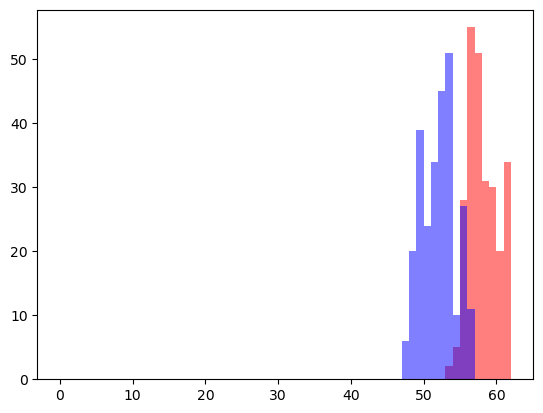

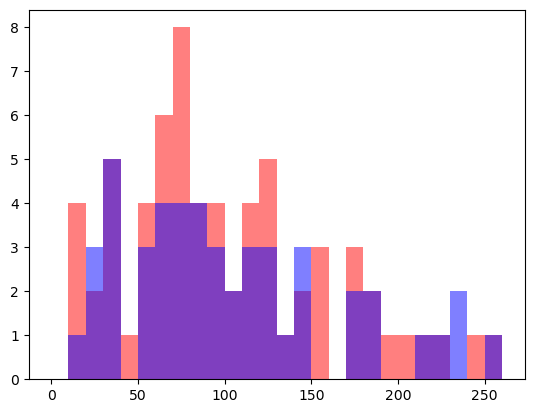

Sperm Per Frame Pred - Mean:  57.87265917602996 , Std:  2.3204597342382485 , Normalized Mean:  0.9186136377147613 , Normalized Std:  0.036832694194257914
Sperm Per Frame GT - Mean:  51.57677902621723 , Std:  2.3006073371416327 , Normalized Mean:  0.8186790321621783 , Normalized Std:  0.036517576780025915
Frames Per Sperm Pred - Mean:  156.08080808080808 , Std:  91.65092721818512 , Normalized Mean:  0.5845723149093935 , Normalized Std:  0.34326189969357723
Frames Per Sperm GT - Mean:  170.01234567901236 , Std:  92.93878163358302 , Normalized Mean:  0.6367503583483609 , Normalized Std:  0.3480853244703484


In [6]:
import pandas as pd

def spermPerFrame(df, return_summary=False):
    # Count occurrences of each sperm count in each frame
    frame_counts = {}
    max_sperm = df["sperm"].max()
    sperm_labels = list(range(max_sperm + 1))  # Generate labels from 0 to max_sperm

    for frame in df["frame"].unique():
        frame_counts[frame] = df[df["frame"] == frame]["sperm"].value_counts().reindex(sperm_labels).fillna(0)

    # Create a DataFrame for sperm counts per frame
    frame_summary = pd.DataFrame.from_dict(frame_counts, orient='index', columns=sperm_labels)
    frame_summary.index.name = "frame"
    frame_summary.reset_index(inplace=True)

    # Add a column for total sperms observed in each frame
    frame_summary["TotalSperms"] = frame_summary[sperm_labels].sum(axis=1)

    # Extract ["TotalSperms"] as numpy array
    array = frame_summary["TotalSperms"].values

    if return_summary:
        return array, frame_summary
    else:
        return array

def framesPerSperm(df, return_summary=False):
    sperm_counts = {}
    max_frame = df["frame"].max()
    frame_labels = list(range(max_frame + 1)) # Generate labels from 0 to max_frame

    for sperm in df["sperm"].unique():
        sperm_counts[sperm] = df[df["sperm"] == sperm]["frame"].value_counts().reindex(frame_labels).fillna(0)

    # Create a DataFrame for frame counts per sperm
    sperm_summary = pd.DataFrame.from_dict(sperm_counts, orient='index', columns=frame_labels)
    sperm_summary.index.name = "sperm"
    sperm_summary.reset_index(inplace=True)

    # Add a column for total sperms observed in each frame
    sperm_summary["TotalFrames"] = sperm_summary[frame_labels].sum(axis=1)

    # Remove sperms that are not observed in any frame
    sperm_summary = sperm_summary[sperm_summary["TotalFrames"] > 0]

    # Extract ["TotalFrames"] as numpy array
    array = sperm_summary["TotalFrames"].values

    if return_summary:
        return array, sperm_summary
    else:
        return array


pred_spf = spermPerFrame(pred)
gt_spf = spermPerFrame(gt)

#print(pred_frames)
#print(gt_frames)

pred_fps = framesPerSperm(pred)
gt_fps = framesPerSperm(gt)

#print(pred_sperm)
#print(gt_sperm)

max_sperm = int(max(max(pred_spf), max(gt_spf)))

plt.hist(pred_spf, bins=range(0, max_sperm, 1), alpha=0.5, color='red', label='Predicted')
plt.hist(gt_spf, bins=range(0, max_sperm, 1), alpha=0.5, color='blue',label='Ground Truth')
plt.show()

max_frames = int(max(max(pred_fps), max(gt_fps)))

plt.hist(pred_fps, bins=range(0, max_frames, 10), alpha=0.5, color='red', label='Predicted')
plt.hist(gt_fps, bins=range(0, max_frames, 10), alpha=0.5, color='blue',label='Ground Truth')
plt.show()

print("Sperm Per Frame Pred - Mean: ", np.mean(pred_spf), ", Std: ", np.std(pred_spf), ", Normalized Mean: ", np.mean(pred_spf)/max_sperm, ", Normalized Std: ", np.std(pred_spf)/max_sperm)
print("Sperm Per Frame GT - Mean: ", np.mean(gt_spf), ", Std: ", np.std(gt_spf), ", Normalized Mean: ", np.mean(gt_spf)/max_sperm, ", Normalized Std: ", np.std(gt_spf)/max_sperm)
print("Frames Per Sperm Pred - Mean: ", np.mean(pred_fps), ", Std: ", np.std(pred_fps), ", Normalized Mean: ", np.mean(pred_fps)/max_frames, ", Normalized Std: ", np.std(pred_fps)/max_frames)
print("Frames Per Sperm GT - Mean: ", np.mean(gt_fps), ", Std: ", np.std(gt_fps), ", Normalized Mean: ", np.mean(gt_fps)/max_frames, ", Normalized Std: ", np.std(gt_fps)/max_frames)



### Labeled Metrics

In [21]:
# Create track data needed for calculation (Label, Birth Frame, Death Frame, 0 (no parent))

ref_tracks = []

for s in range(0, gt['sperm'].max() + 1):
    cur_frames = gt[gt['sperm'] == s]['frame'].values
    if len(cur_frames) > 0:
        cur_birth = np.amin(cur_frames)
        cur_death = np.amax(cur_frames)
        cur_parent = 0
        cur_track = [s, cur_birth, cur_death, cur_parent]
        ref_tracks.append(cur_track)

ref_tracks = np.array(ref_tracks)

comp_tracks = []

for s in range(0, pred['sperm'].max() + 1):
    cur_frames = pred[pred['sperm'] == s]['frame'].values
    if len(cur_frames) > 0:
        cur_birth = np.amin(cur_frames)
        cur_death = np.amax(cur_frames)
        cur_parent = 0
        cur_track = [s, cur_birth, cur_death, cur_parent]
        comp_tracks.append(cur_track)

comp_tracks = np.array(comp_tracks)

In [22]:
# Adhoc adjustment for testing
comp_tracks = np.copy(ref_tracks)
pred = gt

In [23]:
from  scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

# Use Hungarian Algorithm to find best track matches between pred and gt in each frame
labels_ref = []
labels_comp = []
mapped_ref = []
mapped_comp = []

# For each frame
for f in range(0, pred['frame'].max() + 1):

    mapped_ref_frame = []
    mapped_comp_frame = []

    # Get the labels in the frame
    labels_ref_frame = gt[gt['frame'] == f]['sperm'].values
    labels_comp_frame = pred[pred['frame'] == f]['sperm'].values

    # Get the centroids in the frame
    ref_centroids = gt[gt['frame'] == f][['x', 'y']].values
    comp_centroids = pred[pred['frame'] == f][['x', 'y']].values

    # Compute the distance matrix
    dist_matrix = cdist(ref_centroids, comp_centroids)

    #import matplotlib.pyplot as plt
    #plt.imshow(dist_matrix);plt.show()
    #print(np.amin(dist_matrix))

    # Use Hungarian Algorithm to find best matches
    row_ind, col_ind = linear_sum_assignment(dist_matrix)

    if (len(row_ind) != len(np.unique(row_ind))):
        print("row issue!")
        print(row_ind.shape,np.unique(row_ind).shape)

    if (len(col_ind) != len(np.unique(col_ind))):
        print("col issue!")
        print(col_ind.shape,np.unique(col_ind).shape)

    #for r, c in zip(row_ind, col_ind):
    #    print(r,c)

    # Save the matches
    for r, c in zip(row_ind, col_ind):
        mapped_ref_frame.append(labels_ref_frame[r])
        mapped_comp_frame.append(labels_comp_frame[c])
    
        #labels_ref_frame.append(ref_labels[r])
        #labels_comp_frame.append(comp_labels[c])
        #mapped_ref_frame.append(gt[(gt['frame'] == f) & (gt['sperm'] == ref_labels[r])]['sperm'].values[0])
        #mapped_comp_frame.append(pred[(pred['frame'] == f) & (pred['sperm'] == comp_labels[c])]['sperm'].values[0])

    labels_ref.append(labels_ref_frame)
    labels_comp.append(labels_comp_frame)
    mapped_ref.append(mapped_ref_frame)
    mapped_comp.append(mapped_comp_frame)

traj = {}
traj['labels_ref'] = labels_ref
traj['labels_comp'] = labels_comp
traj['mapped_ref'] = mapped_ref
traj['mapped_comp'] = mapped_comp

#print(labels_ref)
#print(labels_comp)
#print(mapped_ref)
#print(mapped_comp)

In [24]:
from ctc_metrics.utils.representations import merge_tracks, count_acyclic_graph_correction_operations

new_tracks, new_labels, new_mapped = merge_tracks(
    ref_tracks, traj["labels_ref"], traj["mapped_ref"])
traj["ref_tracks_merged"] = new_tracks
traj["labels_ref_merged"] = new_labels
traj["mapped_ref_merged"] = new_mapped
new_tracks, new_labels, new_mapped = merge_tracks(
    comp_tracks, traj["labels_comp"], traj["mapped_comp"])
traj["comp_tracks_merged"] = new_tracks
traj["labels_comp_merged"] = new_labels
traj["mapped_comp_merged"] = new_mapped

graph_operations = \
            count_acyclic_graph_correction_operations(
                ref_tracks, comp_tracks,
                traj["labels_ref"], traj["labels_comp"],
                traj["mapped_ref"], traj["mapped_comp"]
            )

print(graph_operations)

{'num_vertices_R': 13771, 'num_vertices_C': 13771, 'num_vertices': 13771, 'TP': 13766, 'FN': 5, 'FP': 5, 'VS': 0, 'NS': 0, 'ED': 0, 'EA': 10, 'EC': 0, 'num_edges': 13621}


In [25]:
from ctc_metrics.metrics import (
    valid, det, seg, tra, ct, tf, bc, cca, mota, hota, idf1, chota, mtml, faf,
    op_ctb, op_csb, bio, op_clb, lnk
)

results = {}
results["DET"] = det(**graph_operations)
_tra, _aogm, _aogm0 = tra(**graph_operations)
results["TRA"] = _tra
results["AOGM"] = _aogm
results["AOGM_0"] = _aogm0
for key in ("NS", "FN", "FP", "ED", "EA", "EC"):
    results[f"AOGM_{key}"] = graph_operations[key]

results["LNK"] = lnk(**graph_operations)

results["CT"] = ct(
            comp_tracks, ref_tracks,
            traj["labels_ref"], traj["mapped_ref"], traj["mapped_comp"])

results["TF"] = tf(
    ref_tracks,
    traj["labels_ref"], traj["mapped_ref"], traj["mapped_comp"])


results.update(mota(
    traj["labels_ref_merged"], traj["labels_comp_merged"],
    traj["mapped_ref_merged"], traj["mapped_comp_merged"]))

results.update(hota(
    traj["labels_ref_merged"], traj["labels_comp_merged"],
    traj["mapped_ref_merged"], traj["mapped_comp_merged"]))

results.update(idf1(
    traj["labels_ref_merged"], traj["labels_comp_merged"],
    traj["mapped_ref_merged"], traj["mapped_comp_merged"]))


In [26]:
for key,val in results.items():
    print(key, val)

DET 0.9996006099774889
TRA 0.9995573584416487
AOGM 70.0
AOGM_0 158141.5
AOGM_NS 0
AOGM_FN 5
AOGM_FP 5
AOGM_ED 0
AOGM_EA 10
AOGM_EC 0
LNK 0.9992658395125175
CT 0.9382716049382716
TF 0.8724737161136049
MOTA 0.9992738363227072
TP 13771
FP 5
FN 0
IDSW 0
MULTI-ASSIGNMENTS 5
Precision 0.999637049941928
Recall 1.0
HOTA 1.0
IDF1 1.0
IDP 1.0
IDR 1.0
IDTP 13766.0
IDFP 0.0
IDFN 0.0
